In [24]:
# importing different libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
import statistics

In [25]:
# importing the data set from my system 
data = pd.read_csv("E:/Job_Placement_Data.csv")
# taking a look at data
print(data.head(10))
print(data.shape)

  gender  ssc_percentage ssc_board  hsc_percentage hsc_board hsc_subject  \
0      M           67.00    Others           91.00    Others    Commerce   
1      M           79.33   Central           78.33    Others     Science   
2      M           65.00   Central           68.00   Central        Arts   
3      M           56.00   Central           52.00   Central     Science   
4      M           85.80   Central           73.60   Central    Commerce   
5      M           55.00    Others           49.80    Others     Science   
6      F           46.00    Others           49.20    Others    Commerce   
7      M           82.00   Central           64.00   Central     Science   
8      M           73.00   Central           79.00   Central    Commerce   
9      M           58.00   Central           70.00   Central    Commerce   

   degree_percentage undergrad_degree work_experience  emp_test_percentage  \
0              58.00         Sci&Tech              No                55.00   
1      

# getting basics about the dataset

In [26]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               215 non-null    object 
 1   ssc_percentage       215 non-null    float64
 2   ssc_board            215 non-null    object 
 3   hsc_percentage       215 non-null    float64
 4   hsc_board            215 non-null    object 
 5   hsc_subject          215 non-null    object 
 6   degree_percentage    215 non-null    float64
 7   undergrad_degree     215 non-null    object 
 8   work_experience      215 non-null    object 
 9   emp_test_percentage  215 non-null    float64
 10  specialisation       215 non-null    object 
 11  mba_percent          215 non-null    float64
 12  status               215 non-null    object 
dtypes: float64(5), object(8)
memory usage: 22.0+ KB
None


In [27]:
#data.isnull().sum()
data.describe()

,ssc_percentage,hsc_percentage,degree_percentage,emp_test_percentage,mba_percent
count,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186
std,10.827205,10.897509,7.358743,13.275956,5.833385
min,40.890000,37.000000,50.000000,50.000000,51.210000
25%,60.600000,60.900000,61.000000,60.000000,57.945000
50%,67.000000,65.000000,66.000000,71.000000,62.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000
max,89.400000,97.700000,91.000000,98.000000,77.890000


# Exploratory data analysis

In [28]:
# categorical features 
categorical_features = data.select_dtypes('object').columns

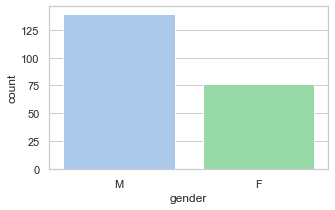

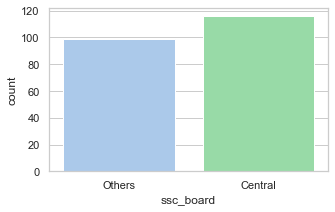

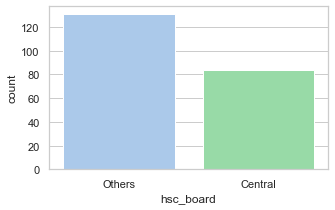

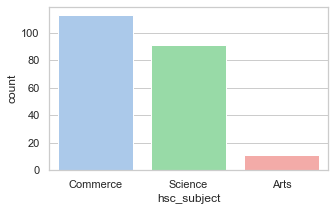

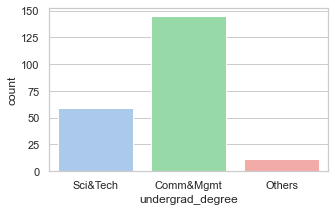

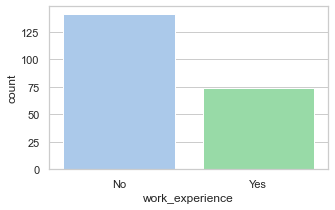

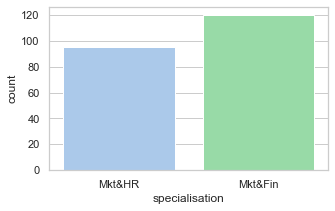

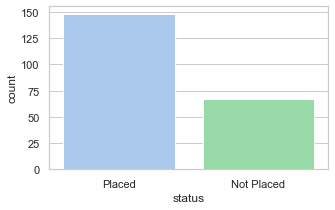

In [29]:
# comparing all the categorical data
import seaborn as sns
for i in categorical_features:
    plt.figure(figsize = (5,3))

    sns.countplot(x = i,data = data,palette = ('pastel6'))
    plt.show()
    print(end = '')

    

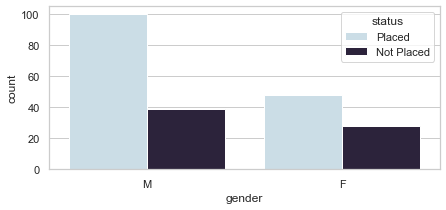

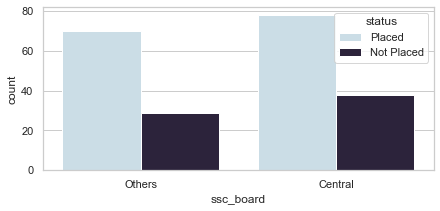

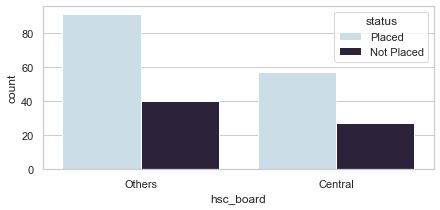

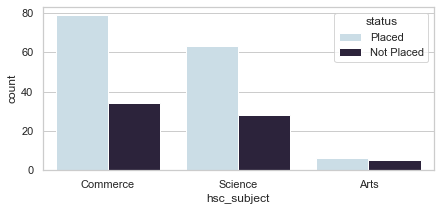

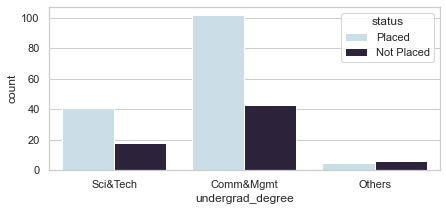

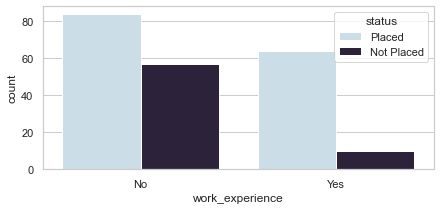

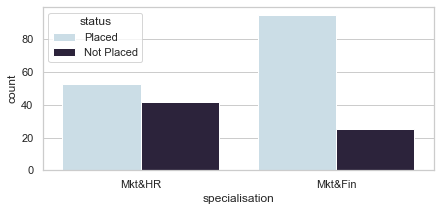

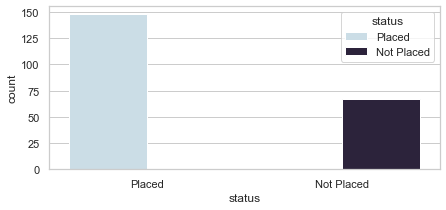

In [30]:
# comparing all the categorical data with target data

import seaborn as sns
for i in categorical_features:
    plt.figure(figsize = (7,3))
    sns.set_theme(style="whitegrid")

    sns.countplot(x = i,data = data,hue = 'status',palette = 'ch:s=.25,rot=-.25')
    plt.show()
    print(end = '')

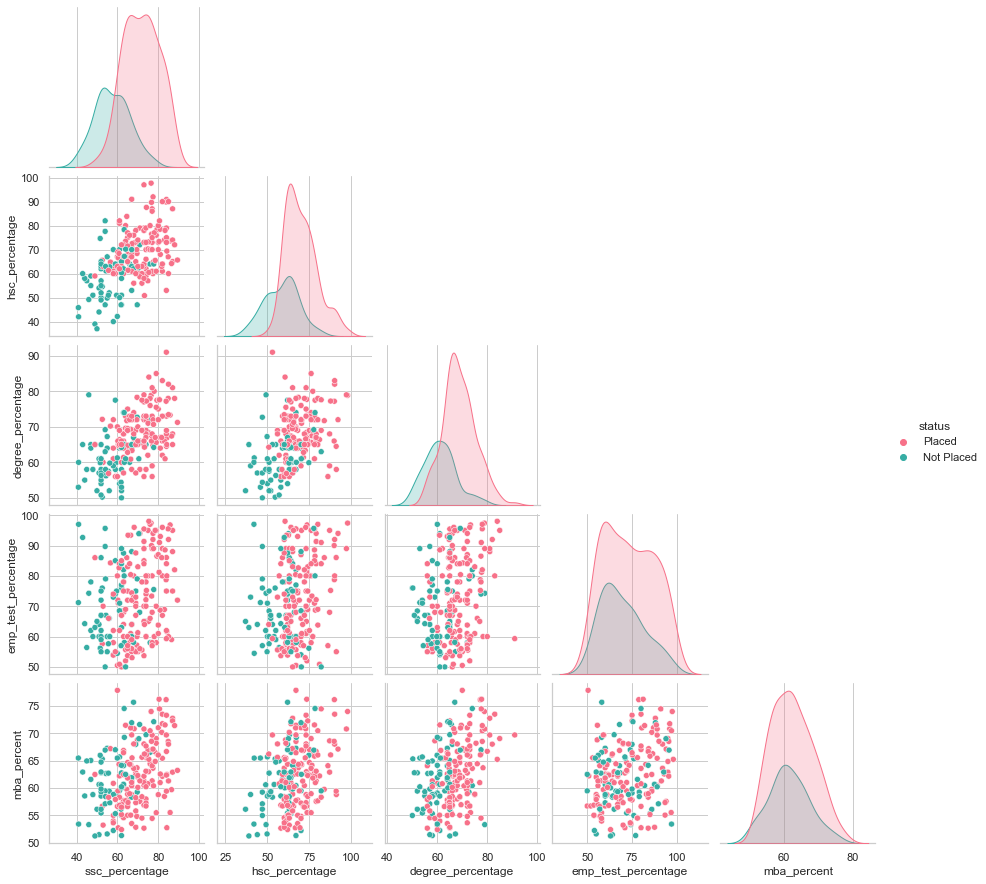

In [31]:
# pair plot for all continous data with target data

sns.pairplot(data, hue = 'status' ,kind ='scatter',palette = 'husl',corner = True)
plt.show()

In [32]:
# finding the correlations 
matrix = data.corr()

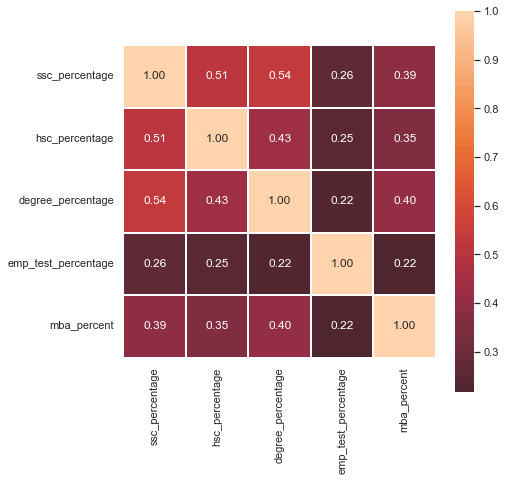

In [33]:
# checking correlation among CONTINOUS DATA
plt.figure(figsize = (7,7))
sns.heatmap(matrix,center = 0,fmt = '.2f',annot = True,square = True,linewidth = .4)
plt.show()

In [34]:
# getting all numeric columns
numeric_columns = data.select_dtypes('float64').columns

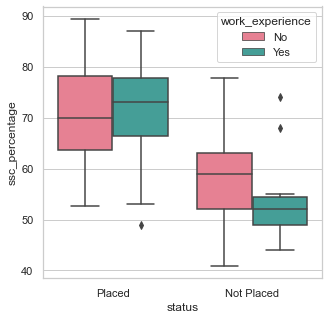

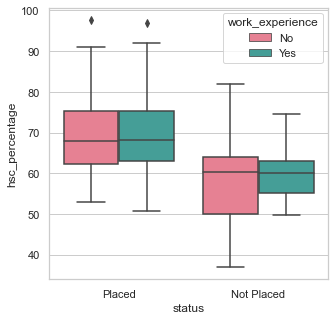

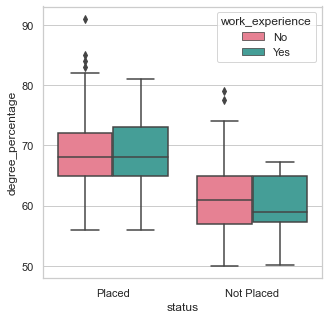

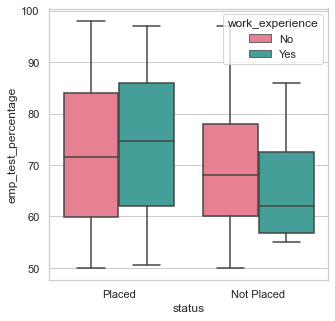

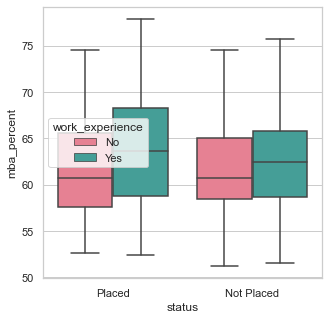

In [35]:
# checking outliers among all the numerical data according to the 
for i in numeric_columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(y = i,x = 'status',hue = 'work_experience',data = data,palette = 'husl',orient ='v')
    plt.show()

In [36]:
#handling outliers in degree_percentage 
outliers = data[(data['degree_percentage'] > 80)&(data['work_experience'] == 'No')&(data['status'] == 'Placed')].index
outliers1 = data[(data['ssc_percentage'] > 70)&(data['work_experience'] == 'Yes')&(data['status'] == 'Not Placed')].index


In [37]:
# not much outliers so we are deleting them 
data.drop(outliers, inplace = True)
data.drop(outliers1, inplace = True)

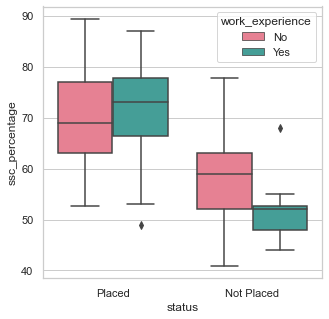

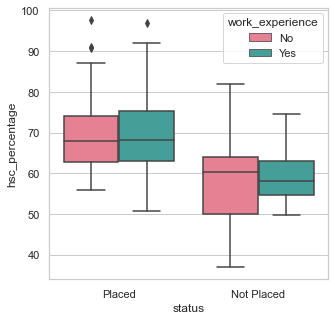

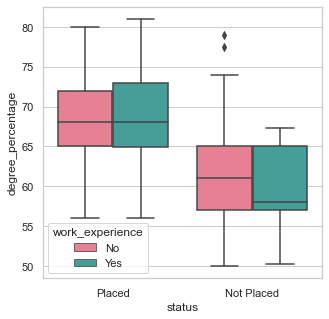

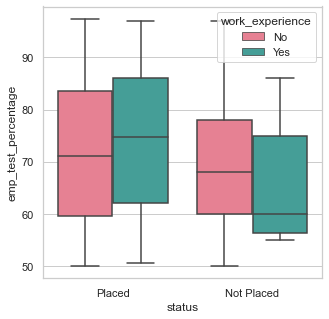

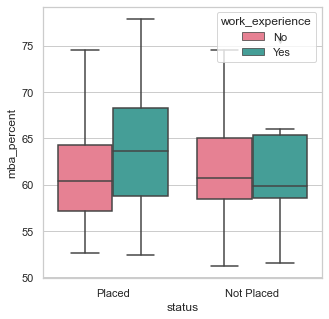

In [38]:
# boxplot after handling outliers
# checking outliers among all the numerical data according to the 
for i in numeric_columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(y = i,x = 'status',hue = 'work_experience',data = data,palette = 'husl',orient ='v')
    plt.show()

# lets preprocessing the data for the model

In [39]:
# train test split the data 
y = data['status']
x = data.drop(['status'],axis = 1)
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.3,random_state = 1)

In [40]:
# implementing one hot encoding on train and test data preprocessing the training and testing data
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first',sparse = False)
x1 = ohe.fit_transform(x_train[categorical_features[0:7]])
x2 = x_train[numeric_columns].values
x_train1 = np.hstack((x1,x2))
# for x_test value also we need to do
ohe = OneHotEncoder(drop = 'first',sparse = False)
xtest1 = ohe.fit_transform(x_test[categorical_features[0:7]])
xtest2 = x_test[numeric_columns].values
x_test1 = np.hstack((xtest1,xtest2))

In [41]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train1,y_train)

C:\Users\ABCD\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# ohe categories
cat = ohe.get_feature_names(categorical_features[0:7])

In [55]:
model.coef_

array([[-0.04425002, -0.26185422,  0.30949783, -0.4084109 , -0.02694821,
        -0.41352443, -0.82865029,  1.39283985, -0.46712221,  0.19235717,
         0.08865491,  0.04296918, -0.01737198, -0.2890661 ]])

In [120]:
y_predict = model.predict(x_test1)

In [121]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [122]:
#confusion matrix

confusion_matrix(y_test,y_predict,labels = ['Placed','Not Placed'])
#confusion_matrix(y_test,y_predict)

array([[35,  4],
       [ 3, 21]], dtype=int64)

In [137]:
#precision_score for placed
p1 = precision_score(y_test,y_predict,pos_label = 'Placed')
# precision _ score for not placed
p2 = precision_score(y_test,y_predict,pos_label = 'Not Placed')


In [139]:
#recall_score for placed
r1 = recall_score(y_test,y_predict,pos_label = 'Placed')
#recall_score for not placed
r2 = recall_score(y_test,y_predict,pos_label = 'Not Placed')


(0.8974358974358975, 0.875)

In [140]:
#f1_score for placed
f1 = f1_score(y_test,y_predict,pos_label = 'Placed')
#f1_score for not placed
f2 = f1_score(y_test,y_predict,pos_label = 'Not Placed')


In [142]:
p1,p2,r1,r2,f1,f2

(0.9210526315789473,
 0.84,
 0.8974358974358975,
 0.875,
 0.9090909090909091,
 0.8571428571428572)